In [19]:
import pandas as pd
import numpy as np
import matplotlib as plt

pt = pd.read_csv('./pt.csv', sep=';') 

In [20]:
mof_compo = pd.read_csv('./compositional_data2500.txt', sep=',',header=None)
mof_compo.columns=['Element','Number','Mass','Percentage']
mof_compo.head()

,Element,Number,Mass,Percentage
0,ABADUG,X,X,#
1,C,153,1837.64322,0.6478188727410636
2,H,90,90.71469,0.03197937857428878
3,N,6,84.040218,0.029626446906093798
4,O,27,431.983935,0.15228600566651285


In [21]:
# creates a dictionary with the refcode and the price of the MOF ($/kg)
# by additioning the price of each element in the MOF, mulltiplied by its percentage mass
mof_dict={}
for i in range(len(mof_compo)):
    element = mof_compo.iloc[i]['Element']

    
    if len(element)>3:
        mof=element
        mof_dict[mof]=0
    else:
        
        index = pt.index[pt['Symbol']==element].tolist()
        price = pt.iloc[index]['Price($/kg)']
        percentage = mof_compo.iloc[i]['Percentage']
    
        mof_dict[mof]+= float(price) * float(percentage)

In [22]:
len(mof_dict)

2556

In [23]:
# turns the dictionary into a pandas df
mof_df=pd.DataFrame.from_dict(mof_dict,orient="index")
mof_df.columns=["Price"]

In [24]:
mof_df

,Price
ABADUG,0.395507
ABEDEU,8505.050603
ABELOM01,0.947842
ABEXEN,40.343247
ACEMEE,1.837388
...,...
ZUMZAL,1.091847
ZUSCOI,0.510016
ZUSDEZ,6.181863
ZUWXUM,57.820263


In [25]:
# creates a dictionary with the refcode and the supply risk of the MOF ($/kg)
mof_dict2={}
for i in range(len(mof_compo)):
    element = mof_compo.iloc[i]['Element']


    
    if len(element)>3:

        mof=element
        mof_dict2[mof]=0
    else:
        
        index = pt.index[pt['Symbol']==element].tolist()
        supply = pt.iloc[index]['Supply risk']
        percentage = mof_compo.iloc[i]['Percentage']
    
        mof_dict2[mof]+= float(supply) * float(percentage)
        
mof_dict2
mof_df2=pd.DataFrame.from_dict(mof_dict2,orient="index")
mof_df2.columns=["Supply risk"]

# merge the two mof_df to get one df
mof_score = pd.merge(mof_df, mof_df2, left_index=True,right_index=True)
mof_score

,Price,Supply risk
ABADUG,0.395507,1.710506
ABEDEU,8505.050603,1.379449
ABELOM01,0.947842,1.196494
ABEXEN,40.343247,1.549939
ACEMEE,1.837388,1.412377
...,...,...
ZUMZAL,1.091847,1.610618
ZUSCOI,0.510016,1.635174
ZUSDEZ,6.181863,1.595785
ZUWXUM,57.820263,1.636558


In [26]:
# creates a dictionary with the refcode and the radioactivity of the MOF ($/kg)

mof_dict3={}
for i in range(len(mof_compo)):
    element = mof_compo.iloc[i]['Element']


    
    if len(element)>3:

        mof=element
        mof_dict3[mof]=0
    else:
        
        index = pt.index[pt['Symbol']==element].tolist()
        radioactive = pt.iloc[index]['Radioactive']
        percentage = mof_compo.iloc[i]['Percentage']
    
        mof_dict3[mof]+= float(radioactive) * float(percentage)
        
mof_dict3
mof_df3=pd.DataFrame.from_dict(mof_dict3,orient="index")
mof_df3.columns=["Radioactive"]

# merge the two mof_df to get one df
mof_score = pd.merge(mof_score, mof_df3, left_index=True,right_index=True)
mof_score

,Price,Supply risk,Radioactive
ABADUG,0.395507,1.710506,0.0
ABEDEU,8505.050603,1.379449,0.0
ABELOM01,0.947842,1.196494,0.0
ABEXEN,40.343247,1.549939,0.0
ACEMEE,1.837388,1.412377,0.0
...,...,...,...
ZUMZAL,1.091847,1.610618,0.0
ZUSCOI,0.510016,1.635174,0.0
ZUSDEZ,6.181863,1.595785,0.0
ZUWXUM,57.820263,1.636558,0.0


In [27]:
# creates a dictionary with the refcode and the toxicity of the MOF ($/kg)
mof_dict4={}
for i in range(len(mof_compo)):
    element = mof_compo.iloc[i]['Element']


    
    if len(element)>3:

        mof=element
        mof_dict4[mof]=0
    else:
        
        index = pt.index[pt['Symbol']==element].tolist()
        toxicity = pt.iloc[index]['toxicity']
        percentage = mof_compo.iloc[i]['Percentage']
    
        mof_dict4[mof]+= float(toxicity) * float(percentage)
        
mof_dict4
mof_df4=pd.DataFrame.from_dict(mof_dict4,orient="index")
mof_df4.columns=["Toxicity"]

# merge the two mof_df to get one df
mof_score = pd.merge(mof_score, mof_df4, left_index=True,right_index=True)
mof_score

,Price,Supply risk,Radioactive,Toxicity
ABADUG,0.395507,1.710506,0.0,0.138289
ABEDEU,8505.050603,1.379449,0.0,0.000000
ABELOM01,0.947842,1.196494,0.0,0.125875
ABEXEN,40.343247,1.549939,0.0,0.000000
ACEMEE,1.837388,1.412377,0.0,0.244009
...,...,...,...,...
ZUMZAL,1.091847,1.610618,0.0,0.000000
ZUSCOI,0.510016,1.635174,0.0,0.614477
ZUSDEZ,6.181863,1.595785,0.0,0.000000
ZUWXUM,57.820263,1.636558,0.0,0.000000


In [28]:
# puts the refcodes as a column instead of indexes in the 
mof_score_indexed = mof_score.reset_index()
mof_score_indexed

# save the file as csv
mof_score_indexed.to_csv('mof_score_indexed.csv')

(-127.75, 2682.75, 0.0, 20000.0)

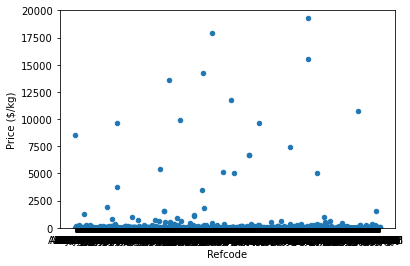

In [28]:
mof_score_plot = mof_score_indexed.plot.scatter(x='index',y='Price')
mof_score_plot.set_xlabel("Refcode")
mof_score_plot.set_ylabel("Price ($/kg)")
mof_score_plot.axis(ymin=0,ymax=20000)

In [29]:
mof_score_indexed = pd.read_csv('./mof_score_indexed2.csv', sep=',')

In [30]:
mof_score_indexed.loc[mof_score_indexed['Price'] >= 2500]

,Unnamed: 0,index,Price,Supply risk,Radioactive,Toxicity
1,1,ABEDEU,8505.050603,1.379449,0.0,0.000000
348,348,DIVRUY,9671.710689,1.234757,0.0,0.097456
349,349,DIVYOZ,3735.838692,0.968011,0.0,0.112866
486,486,EMIPUO,121365.924284,1.301135,0.0,0.042538
709,709,GOMFUL,5426.129116,1.345998,0.0,0.000000
789,789,HOJJAU,13557.637711,1.301438,0.0,0.000000
882,882,IVESOS,9918.852083,1.349991,0.0,0.000000
919,919,JEBWEV,23428.521584,1.261086,0.0,0.081562
1063,1063,KUYJAS,3515.140637,1.619633,0.0,0.000000
1072,1072,LACYUN,14254.474160,1.476918,0.0,0.033086


In [13]:
import pandas as pd

boxes = {'Color': ['Green','Green','Green','Blue','Blue','Red','Red','Red'],
         'Shape': ['Rectangle','Rectangle','Square','Rectangle','Square','Square','Square','Rectangle'],
         'Price': [10,15,5,5,10,15,15,5]
        }

df = pd.DataFrame(boxes, columns= ['Color','Shape','Price'])

select_color = df.loc[df['Color'] == 'Green']
print (select_color)

   Color      Shape  Price
0  Green  Rectangle     10
1  Green  Rectangle     15
2  Green     Square      5


(-127.75, 2682.75, 0.0, 1000.0)

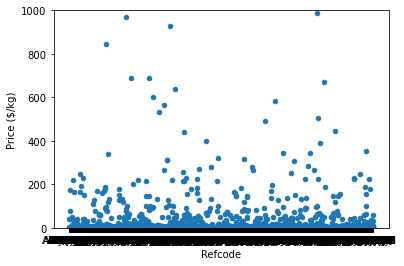

In [36]:
mof_score_plot = mof_score_indexed.plot.scatter(x='index',y='Price')
mof_score_plot.set_xlabel("Refcode")
mof_score_plot.set_ylabel("Price ($/kg)")
mof_score_plot.axis(ymin=0,ymax=1000)

In [27]:
maxValueIndex = mof_score_indexed[['Price','Supply risk']].idxmax()
 
print("Maximum value of column Price is at row index position :")
print(maxValueIndex)

mof_score.iloc[486]
#mof_score.iloc[1250]

Maximum value of column Price is at row index position :
Price           486
Supply risk    1250
dtype: int64


Price          121365.924284
Supply risk         1.301135
Radioactive         0.000000
Toxicity            0.000000
Name: EMIPUO, dtype: float64

Text(0, 0.5, 'Supply Risk')

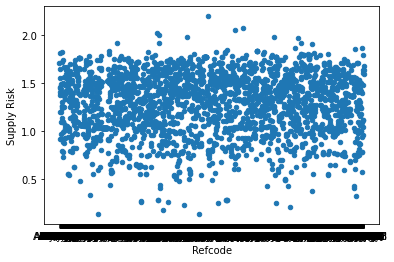

In [46]:
#SUPPLY RISK PLOT
mof_score_plot = mof_score_indexed.plot.scatter(x='index',y='Supply risk')
mof_score_plot.set_xlabel("Refcode")
mof_score_plot.set_ylabel("Supply Risk")


In [31]:
mof_score_indexed['log(Price)'] = np.log10(mof_score_indexed['Price'])
mof_score_indexed

,Unnamed: 0,index,Price,Supply risk,Radioactive,Toxicity,log(Price)
0,0,ABADUG,0.395507,1.710506,0.0,0.138289,-0.402845
1,1,ABEDEU,8505.050603,1.379449,0.0,0.000000,3.929677
2,2,ABELOM01,0.947842,1.196494,0.0,0.125875,-0.023264
3,3,ABEXEN,40.343247,1.549939,0.0,0.000000,1.605771
4,4,ACEMEE,1.837388,1.412377,0.0,0.244009,0.264201
...,...,...,...,...,...,...,...
2551,2551,ZUMZAL,1.091847,1.610618,0.0,0.000000,0.038162
2552,2552,ZUSCOI,0.510016,1.635174,0.0,0.614477,-0.292417
2553,2553,ZUSDEZ,6.181863,1.595785,0.0,0.000000,0.791119
2554,2554,ZUWXUM,57.820263,1.636558,0.0,0.000000,1.762080


(0.0349565909249232, 2.299723404985832, 0.0, 1000.0)

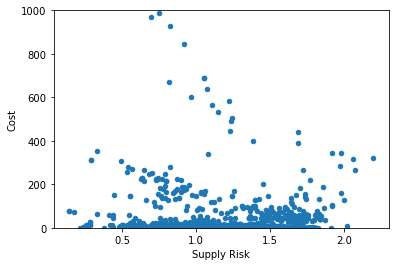

In [34]:
#SUPPLY RISK VS PRICE PLOT

mof_score_plot = mof_score_indexed.plot.scatter(x='Supply risk',y='Price')
mof_score_plot.set_xlabel("Supply Risk")
mof_score_plot.set_ylabel("Cost")
mof_score_plot.axis(ymin=0,ymax=1000)

Text(0, 0.5, 'Cost')

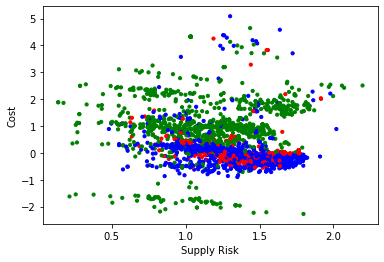

In [33]:
#SUPPLY RISK VS LOG PRICE PLOT

def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('green')
        elif l<=0.3:
            cols.append('blue')
        else:
            cols.append('red')
    return cols

cols=pltcolor(mof_score_indexed['Toxicity'])

mof_score_plot = mof_score_indexed.plot.scatter(x='Supply risk',y='log(Price)', s=10, c = cols)
mof_score_plot.set_xlabel("Supply Risk")
mof_score_plot.set_ylabel("Cost")
#mof_score_plot.axis(ymin=-1,ymax=1.2)

In [49]:
#SUPPLY RISK VS LOG PRICE PLOT
import plotly.express as px
mof_score_plot = px.scatter(mof_score_indexed, x='Supply risk',y='log(Price)', color='Toxicity')
#mof_score_plot.set_xlabel("Supply Risk")
#mof_score_plot.set_ylabel("Cost")
#mof_score_plot.axis(ymin=-1,ymax=1.2)
mof_score_plot.show()

In [42]:
mof_score_indexed.loc[mof_score_indexed['Toxicity'] >= 1.6]

,Unnamed: 0,index,Price,Supply risk,Radioactive,Toxicity,log(Price)
1437,1437,OKUWUN,1.054245,1.118112,0.0,1.903562,0.022942
2327,2327,XESCOO,18.542318,0.981616,0.0,1.841952,1.268164


(-127.75, 2682.75, 0.0, 1000.0)

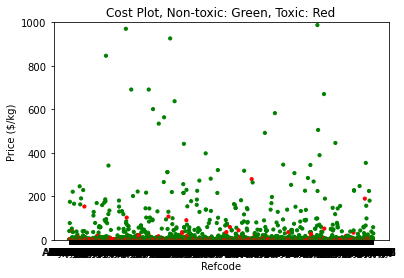

In [31]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('green')
        #elif l==1:
            #cols.append('blue')
        else:
            cols.append('red')
    return cols
# Create the colors list using the function above

cols=pltcolor(mof_score_indexed['Toxicity'])

mof_score_plot = mof_score_indexed.plot.scatter(x='index',y='Price', c = cols, s=10, title='Cost Plot, Non-toxic: Green, Toxic: Red') #Pass on the list created by the function here
#mof_score_plot.grid(True)
mof_score_plot.set_xlabel("Refcode")
mof_score_plot.set_ylabel("Price ($/kg)")
mof_score_plot.axis(ymin=0,ymax=1000)

Text(0, 0.5, 'Price ($/kg)')

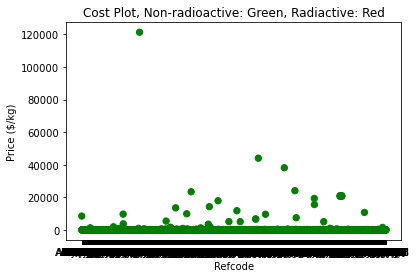

In [30]:
#colours in red when radioactive element in MOF
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('green')
        #elif l==1:
            #cols.append('blue')
        else:
            cols.append('red')
    return cols
# Create the colors list using the function above

cols=pltcolor(mof_score_indexed['Radioactive'])

mof_score_plot = mof_score_indexed.plot.scatter(x='index',y='Price', c = cols, s=40, title='Cost Plot, Non-radioactive: Green, Radiactive: Red') #Pass on the list created by the function here
#mof_score_plot.grid(True)
mof_score_plot.set_xlabel("Refcode")
mof_score_plot.set_ylabel("Price ($/kg)")

In [14]:
mof_compo

,Element,Number,Mass,Percentage
0,ABACUF,X,X,#
1,C,6,72.06444,0.10592009307271566
2,H,14,14.111174,0.020740560301936505
3,Ba,2,274.654,0.40368560753117133
4,Cu,1,63.546,0.09339971606521591
5,O,16,255.99048,0.37625402302896066
6,ABACUF01,X,X,#
7,C,6,72.06444,0.10592009307271566
8,H,14,14.111174,0.020740560301936505
9,Ba,2,274.654,0.40368560753117133


In [15]:
#pd.merge(pt,mof_compo,on="Element",how="inner")

In [16]:
pt=pt.rename(columns={"Symbol":"Element"})

In [20]:
pt

,AtomicNumber,Element,Radioactive,Price($/kg),Supply risk,toxicity
0,1,H,0,0.0,0,0
1,2,He,0,0.0,3,0
2,3,Li,0,75.2,1,0
3,4,Be,0,831.6,0,0
4,5,B,0,0.0,1,0
...,...,...,...,...,...,...
113,114,Fl,1,1.0,0,0
114,115,Mc,1,1.0,0,0
115,116,Lv,1,1.0,0,0
116,117,Ts,1,0.0,0,0
